In [1]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten, AvgPool2D, BatchNormalization, LeakyReLU
from tensorflow.keras.utils import plot_model
import pydot
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

Using TensorFlow backend.


In [2]:
testing_path = 'D:\\Research database\\Fish Detection\\Validation\\' 
training_path = 'D:\\Research database\\Fish Detection\\Train\\'
from keras.preprocessing.image import ImageDataGenerator
train_datagen =  ImageDataGenerator(
    rescale = 1./255,
)
test_datagen = ImageDataGenerator(
    rescale = 1./255
    )

train_dataset = train_datagen.flow_from_directory(training_path,target_size = (324,324),batch_size = 32,)
test_dataset = test_datagen.flow_from_directory(testing_path,target_size = (324,324),batch_size = 32,)

""".fit is used when the entire training dataset can fit into the memory and no data augmentation is applied.
.fit_generator is used when either we have a huge dataset to fit into our memory or when data augmentation needs to be applied.
"""


Found 12604 images belonging to 6 classes.
Found 1191 images belonging to 6 classes.


'.fit is used when the entire training dataset can fit into the memory and no data augmentation is applied.\n.fit_generator is used when either we have a huge dataset to fit into our memory or when data augmentation needs to be applied.\n'

In [3]:
model = Sequential()
# 1st conv block
model.add(Conv2D(32, (3, 3), activation='relu', strides=(2, 2),input_shape=(324,324,3), padding='valid'))
model.add(AvgPool2D(pool_size=(2, 2), padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', strides=(2, 2), padding='same'))
model.add(AvgPool2D(pool_size=(2, 2), padding='same'))

model.add(Conv2D(128, (3, 3), activation='relu', strides=(2, 2), padding='same'))
model.add(MaxPool2D(pool_size=(3, 3), padding='same'))
model.add(Conv2D(128, (5, 5), activation='relu', strides=(2, 2), padding='same'))
model.add(MaxPool2D(pool_size=(3, 3), padding='same'))

# hidden layer
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(6, activation='softmax'))
# compiling the sequential model
model.summary() 


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 161, 161, 32)      896       
_________________________________________________________________
average_pooling2d_1 (Average (None, 81, 81, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 41, 41, 64)        18496     
_________________________________________________________________
average_pooling2d_2 (Average (None, 21, 21, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 128)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 2, 2, 128)        

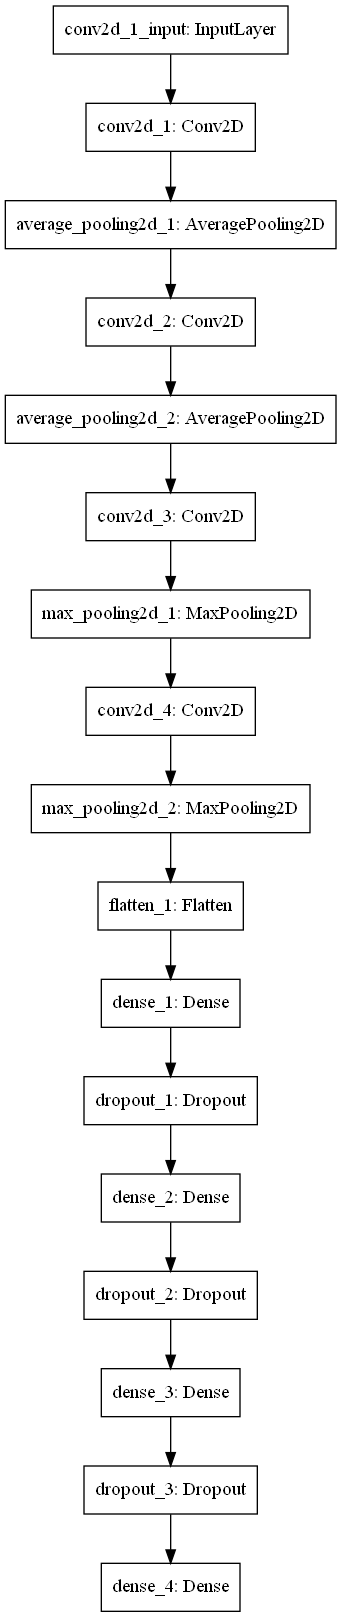

In [4]:
# import os
# os.environ["PATH"] += os.pathsep + r'C:\Program Files\Graphviz\bin'
plot_model(model,to_file='model_1.png')

In [5]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [6]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint("model_1.h5", monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='max', period=1)
early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=10, verbose=1, mode='max')

In [7]:
history = model.fit(
    train_dataset,
    validation_data = test_dataset,
    epochs = 30,
    steps_per_epoch = len(train_dataset),
    validation_steps = len(test_dataset),
    verbose=1,
    callbacks=[checkpoint,early],
    shuffle=True,
    workers = 5
)

Epoch 1/30
394/394 [==============================] - 46s 116ms/step - loss: 0.7419 - accuracy: 0.6826 - val_loss: 0.0164 - val_accuracy: 0.9505

Epoch 00001: val_accuracy improved from -inf to 0.95046, saving model to Shrimp_model_1.h5
Epoch 2/30
394/394 [==============================] - 36s 90ms/step - loss: 0.0579 - accuracy: 0.9815 - val_loss: 0.0049 - val_accuracy: 0.9882

Epoch 00002: val_accuracy improved from 0.95046 to 0.98825, saving model to Shrimp_model_1.h5
Epoch 3/30
394/394 [==============================] - 41s 103ms/step - loss: 0.0248 - accuracy: 0.9915 - val_loss: 8.4628e-04 - val_accuracy: 0.9798

Epoch 00003: val_accuracy did not improve from 0.98825
Epoch 4/30
394/394 [==============================] - 44s 111ms/step - loss: 0.0146 - accuracy: 0.9957 - val_loss: 1.0936e-04 - val_accuracy: 0.9950

Epoch 00004: val_accuracy improved from 0.98825 to 0.99496, saving model to Shrimp_model_1.h5
Epoch 5/30
394/394 [==============================] - 44s 111ms/step - loss

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


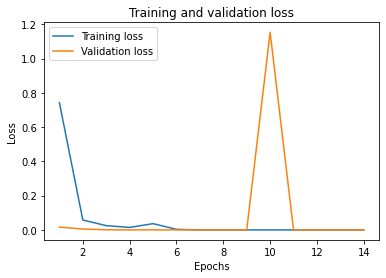

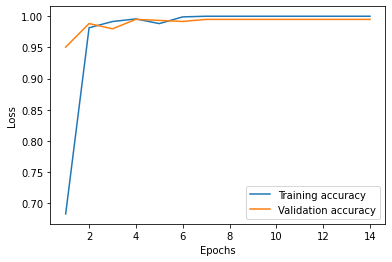

In [8]:
history_dict = history.history
print(history_dict.keys())
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc = history_dict['accuracy']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, loss_values, label="Training loss")
plt.plot(epochs, val_loss_values, label='Validation loss')
plt.title("Training and validation loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig("Model_1_trainingVsvalidationLoss.jpeg")
plt.show()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']
plt.plot(epochs, accuracy, label='Training accuracy')
plt.plot(epochs, val_accuracy, label='Validation accuracy')
plt.xlabel("Epochs")
plt.ylabel('Loss')
plt.legend()
plt.savefig("Model_1_trainingVsvalidationAccuracy.jpeg")
plt.show()

In [9]:
import pandas as pd 
his_df = pd.DataFrame(history_dict)

In [10]:
his_df.to_excel('model_1_history.xlsx',index=False)